# Grover's Algorithm

Algoritmo de Grover para 11. 

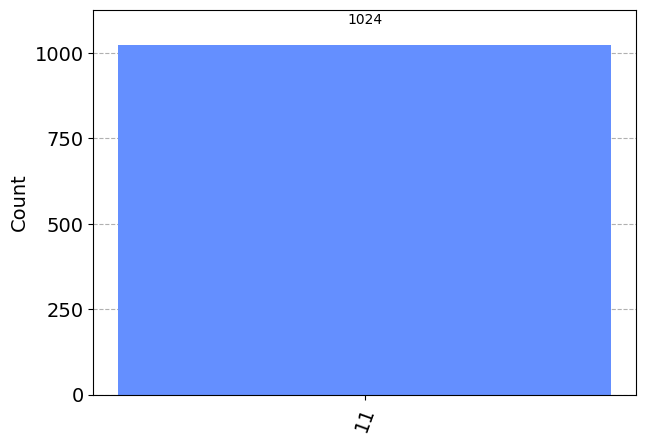

In [24]:
from qiskit import QuantumCircuit, execute, Aer
from qiskit.visualization import plot_histogram

# Paso 1: Preparar el circuito cuántico
num_qubits = 2
grover_circuit = QuantumCircuit(num_qubits)

# Paso 2: Aplicar compuertas Hadamard a todos los qubits
grover_circuit.h(range(num_qubits))

# Paso 3: Definir el oráculo para marcar la solución deseada
# En este caso, marcamos el número 11
def oracle(circuit):
    circuit.cz(0, 1)  # Aplicar una compuerta controlada-Z entre el primer y segundo qubits

# Paso 4: Definir el operador de difusión
def difusion(circuit):
    # Aplicar compuertas Hadamard a todos los qubits
    circuit.h(range(num_qubits))
    # Aplicar compuertas X a todos los qubits
    circuit.x(range(num_qubits))
    # Aplicar una compuerta controlada-Z entre el primer y segundo qubits
    circuit.cz(0, 1)
    # Aplicar compuertas X a todos los qubits
    circuit.x(range(num_qubits))
    # Aplicar compuertas Hadamard a todos los qubits
    circuit.h(range(num_qubits))

# Paso 5: Aplicar el oráculo y el operador de difusión 
oracle(grover_circuit)
difusion(grover_circuit)

# Paso 6: Medir los qubits
grover_circuit.measure_all()

# Paso 7: Simular el circuito utilizando un simulador clásico
simulator = Aer.get_backend('aer_simulator')
job = execute(grover_circuit, simulator, shots=1024)
result = job.result()
counts = result.get_counts(grover_circuit)

# Paso 8: Mostrar los resultados de la medición
# plot_histogram(counts)


In [25]:
grover_circuit.draw()

┌───┐   ┌───┐┌───┐   ┌───┐┌───┐ ░ ┌─┐   
   q_0: ┤ H ├─■─┤ H ├┤ X ├─■─┤ X ├┤ H ├─░─┤M├───
        ├───┤ │ ├───┤├───┤ │ ├───┤├───┤ ░ └╥┘┌─┐
   q_1: ┤ H ├─■─┤ H ├┤ X ├─■─┤ X ├┤ H ├─░──╫─┤M├
        └───┘   └───┘└───┘   └───┘└───┘ ░  ║ └╥┘
meas: 2/═══════════════════════════════════╩══╩═
                                           0  1

Pruebo a encontral el 10

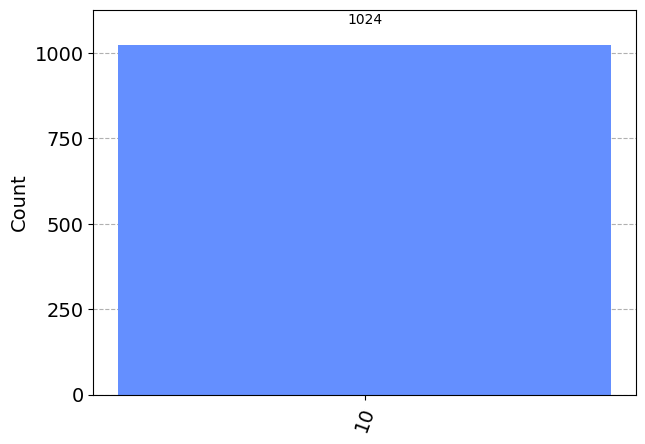

In [6]:
from qiskit import QuantumCircuit, execute, Aer
from qiskit.visualization import plot_histogram

# Paso 1: Preparar el circuito cuántico
num_qubits = 2
grover_circuit = QuantumCircuit(num_qubits)

# Paso 2: Aplicar compuertas Hadamard a todos los qubits
grover_circuit.h(range(num_qubits))

# Paso 3: Definir el oráculo para marcar la solución deseada
# En este caso, marcamos el número 11
def oracle(circuit):
    circuit.cz(0, 1)  # Aplicar una compuerta controlada-Z entre el primer y segundo qubits
    circuit.x(0)

# Paso 4: Definir el operador de difusión
def difusion(circuit):
    # Aplicar compuertas Hadamard a todos los qubits
    circuit.h(range(num_qubits))
    # Aplicar compuertas X a todos los qubits
    circuit.x(range(num_qubits))
    # Aplicar una compuerta controlada-Z entre el primer y segundo qubits
    circuit.cz(0, 1)
    # Aplicar compuertas X a todos los qubits
    circuit.x(range(num_qubits))
    # Aplicar compuertas Hadamard a todos los qubits
    circuit.h(range(num_qubits))

# Paso 5: Aplicar el oráculo y el operador de difusión 
oracle(grover_circuit)
difusion(grover_circuit)

# Paso 6: Medir los qubits
grover_circuit.measure_all()

# Paso 7: Simular el circuito utilizando un simulador clásico
simulator = Aer.get_backend('aer_simulator')
job = execute(grover_circuit, simulator, shots=1024)
result = job.result()
counts = result.get_counts(grover_circuit)

# Paso 8: Mostrar los resultados de la medición
plot_histogram(counts)


In [7]:
grover_circuit.draw()

┌───┐   ┌───┐┌───┐┌───┐   ┌───┐┌───┐ ░ ┌─┐   
   q_0: ┤ H ├─■─┤ X ├┤ H ├┤ X ├─■─┤ X ├┤ H ├─░─┤M├───
        ├───┤ │ ├───┤├───┤└───┘ │ ├───┤├───┤ ░ └╥┘┌─┐
   q_1: ┤ H ├─■─┤ H ├┤ X ├──────■─┤ X ├┤ H ├─░──╫─┤M├
        └───┘   └───┘└───┘        └───┘└───┘ ░  ║ └╥┘
meas: 2/════════════════════════════════════════╩══╩═
                                                0  1

Probando para el 01

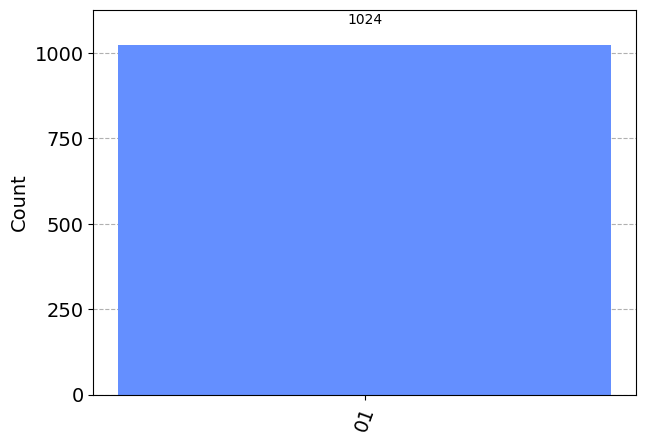

In [8]:

# Paso 1: Preparar el circuito cuántico
num_qubits = 2
grover_circuit = QuantumCircuit(num_qubits)

# Paso 2: Aplicar compuertas Hadamard a todos los qubits
grover_circuit.h(range(num_qubits))

# Paso 3: Definir el oráculo para marcar la solución deseada
# En este caso, marcamos el número 11
def oracle(circuit):
    circuit.cz(0, 1)  # Aplicar una compuerta controlada-Z entre el primer y segundo qubits
    circuit.x(1)

# Paso 4: Definir el operador de difusión
def difusion(circuit):
    # Aplicar compuertas Hadamard a todos los qubits
    circuit.h(range(num_qubits))
    # Aplicar compuertas X a todos los qubits
    circuit.x(range(num_qubits))
    # Aplicar una compuerta controlada-Z entre el primer y segundo qubits
    circuit.cz(0, 1)
    # Aplicar compuertas X a todos los qubits
    circuit.x(range(num_qubits))
    # Aplicar compuertas Hadamard a todos los qubits
    circuit.h(range(num_qubits))

# Paso 5: Aplicar el oráculo y el operador de difusión 
oracle(grover_circuit)
difusion(grover_circuit)

# Paso 6: Medir los qubits
grover_circuit.measure_all()

# Paso 7: Simular el circuito utilizando un simulador clásico
simulator = Aer.get_backend('aer_simulator')
job = execute(grover_circuit, simulator, shots=1024)
result = job.result()
counts = result.get_counts(grover_circuit)

# Paso 8: Mostrar los resultados de la medición
plot_histogram(counts)


In [9]:
grover_circuit.draw()

┌───┐   ┌───┐┌───┐        ┌───┐┌───┐ ░ ┌─┐   
   q_0: ┤ H ├─■─┤ H ├┤ X ├──────■─┤ X ├┤ H ├─░─┤M├───
        ├───┤ │ ├───┤├───┤┌───┐ │ ├───┤├───┤ ░ └╥┘┌─┐
   q_1: ┤ H ├─■─┤ X ├┤ H ├┤ X ├─■─┤ X ├┤ H ├─░──╫─┤M├
        └───┘   └───┘└───┘└───┘   └───┘└───┘ ░  ║ └╥┘
meas: 2/════════════════════════════════════════╩══╩═
                                                0  1

Finalmente para el 00

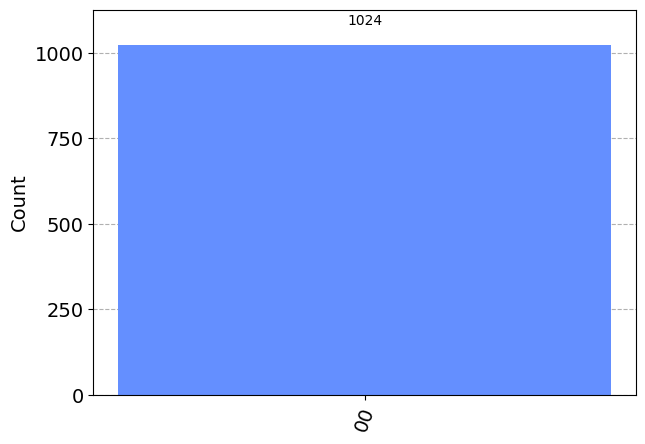

In [10]:
# Paso 1: Preparar el circuito cuántico
num_qubits = 2
grover_circuit = QuantumCircuit(num_qubits)

# Paso 2: Aplicar compuertas Hadamard a todos los qubits
grover_circuit.h(range(num_qubits))

# Paso 3: Definir el oráculo para marcar la solución deseada
# En este caso, marcamos el número 11
def oracle(circuit):
    circuit.cz(0, 1)  # Aplicar una compuerta controlada-Z entre el primer y segundo qubits
    circuit.x(0)
    circuit.x(1)

# Paso 4: Definir el operador de difusión
def difusion(circuit):
    # Aplicar compuertas Hadamard a todos los qubits
    circuit.h(range(num_qubits))
    # Aplicar compuertas X a todos los qubits
    circuit.x(range(num_qubits))
    # Aplicar una compuerta controlada-Z entre el primer y segundo qubits
    circuit.cz(0, 1)
    # Aplicar compuertas X a todos los qubits
    circuit.x(range(num_qubits))
    # Aplicar compuertas Hadamard a todos los qubits
    circuit.h(range(num_qubits))

# Paso 5: Aplicar el oráculo y el operador de difusión 
oracle(grover_circuit)
difusion(grover_circuit)

# Paso 6: Medir los qubits
grover_circuit.measure_all()

# Paso 7: Simular el circuito utilizando un simulador clásico
simulator = Aer.get_backend('aer_simulator')
job = execute(grover_circuit, simulator, shots=1024)
result = job.result()
counts = result.get_counts(grover_circuit)

# Paso 8: Mostrar los resultados de la medición
plot_histogram(counts)

In [11]:
grover_circuit.draw()

┌───┐   ┌───┐┌───┐┌───┐   ┌───┐┌───┐ ░ ┌─┐   
   q_0: ┤ H ├─■─┤ X ├┤ H ├┤ X ├─■─┤ X ├┤ H ├─░─┤M├───
        ├───┤ │ ├───┤├───┤├───┤ │ ├───┤├───┤ ░ └╥┘┌─┐
   q_1: ┤ H ├─■─┤ X ├┤ H ├┤ X ├─■─┤ X ├┤ H ├─░──╫─┤M├
        └───┘   └───┘└───┘└───┘   └───┘└───┘ ░  ║ └╥┘
meas: 2/════════════════════════════════════════╩══╩═
                                                0  1